In [22]:
from keras.datasets import mnist
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import KFold
import numpy as np
from keras.constraints import max_norm

In [23]:
#loading mnist data set
(trainX, trainy), (testX, testy) = mnist.load_data()

Train Set: X=(60000, 28, 28), y=(60000,)
Test Set: X=(10000, 28, 28), y=(10000,)


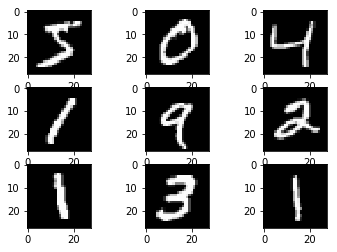

In [24]:
print('Train Set: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test Set: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [25]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [26]:
# one hot encode target values
trainy = to_categorical(trainy)
testy = to_categorical(testy)

Train Set: X=(60000, 28, 28), y=(60000, 10)
Test Set: X=(10000, 28, 28), y=(10000, 10)


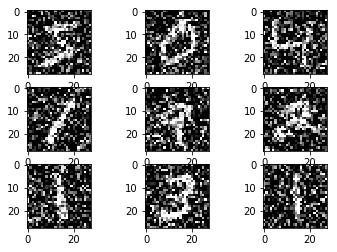

In [27]:
noise_factor = 0.5
trainX_noise = trainX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=trainX.shape)
testX_noise = testX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=testX.shape)
trainX_noise = np.clip(trainX_noise, 0, 1)
testX_noise = np.clip(testX_noise, 0, 1)
print('Train Set: X=%s, y=%s' % (trainX_noise.shape, trainy.shape))
print('Test Set: X=%s, y=%s' % (testX_noise.shape, testy.shape))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX_noise[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [32]:
# reshape dataset to have a single channel
trainX_noise = trainX_noise.reshape((trainX.shape[0], 28, 28, 1))
testX_noise = testX_noise.reshape((testX.shape[0], 28, 28, 1))
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
print('Train Set: X=%s, y=%s' % (trainX_noise.shape, trainy.shape))
print('Test Set: X=%s, y=%s' % (testX_noise.shape, testy.shape))

Train Set: X=(60000, 28, 28, 1), y=(60000, 10)
Test Set: X=(10000, 28, 28, 1), y=(10000, 10)


In [33]:
#autoencoder model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(2), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), kernel_constraint=max_norm(2), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), kernel_constraint=max_norm(2), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2DTranspose(64, kernel_size=(3,3), kernel_constraint=max_norm(2), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(1, kernel_size=(3, 3), kernel_constraint=max_norm(2), activation='sigmoid', padding='same'))

# compile model
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 1)         577       
Total params: 47,425
Trainable params: 47,425
Non-trainable params: 0
_________________________________________________________________


In [35]:
# fit model
history = model.fit(trainX_noise, trainX, epochs=10, batch_size=32, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 218s 5ms/step - loss: 0.1067 - val_loss: 0.0984
Epoch 2/10
48000/48000 [==============================] - 216s 5ms/step - loss: 0.0971 - val_loss: 0.0966
Epoch 3/10
48000/48000 [==============================] - 212s 4ms/step - loss: 0.0958 - val_loss: 0.0960
Epoch 4/10
48000/48000 [==============================] - 214s 4ms/step - loss: 0.0951 - val_loss: 0.0954
Epoch 5/10
48000/48000 [==============================] - 217s 5ms/step - loss: 0.0945 - val_loss: 0.0949
Epoch 6/10
48000/48000 [==============================] - 223s 5ms/step - loss: 0.0941 - val_loss: 0.0946
Epoch 7/10
48000/48000 [==============================] - 243s 5ms/step - loss: 0.0938 - val_loss: 0.0943
Epoch 8/10
48000/48000 [==============================] - 221s 5ms/step - loss: 0.0934 - val_loss: 0.0941
Epoch 9/10
48000/48000 [==============================

In [44]:
#predicting denoising train and test images
denoised_samples_train = model.predict(trainX_noise)
denoised_samples_test = model.predict(testX_noise)

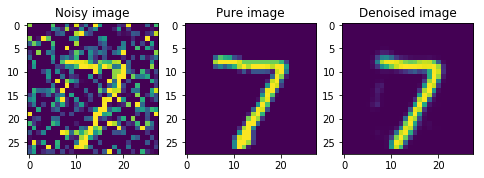

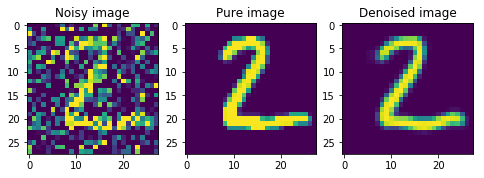

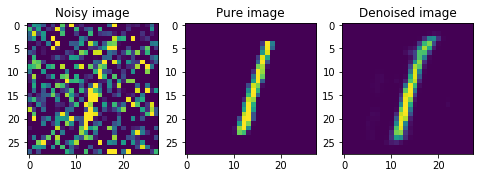

In [42]:
#showing denoised images
for i in range(0, 3):
    noisy_image = testX_noise[i][:,:,0]
    pure_image = testX[i][:,:,0]
    denoised_image = denoised_samples[i][:,:,0]
    fig, axes = pyplot.subplots(1, 3)
    fig.set_size_inches(8, 3.5)
    # Plot sample and reconstruciton
    axes[0].imshow(noisy_image)
    axes[0].set_title('Noisy image')
    axes[1].imshow(pure_image)
    axes[1].set_title('Pure image')
    axes[2].imshow(denoised_image)
    axes[2].set_title('Denoised image')
    pyplot.show()

In [48]:
#Use previous classification model 
model_classification = Sequential()
model_classification.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_classification.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model_classification.add(Flatten())
model_classification.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_classification.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model_classification.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model_classification.fit(denoised_samples_train, trainy, epochs=10, batch_size=32, validation_data=(denoised_samples_test, testy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 769us/step - loss: 0.1950 - accuracy: 0.9380 - val_loss: 0.1154 - val_accuracy: 0.9618
Epoch 2/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.0965 - accuracy: 0.9685 - val_loss: 0.0883 - val_accuracy: 0.9722
Epoch 3/10
60000/60000 [==============================] - 50s 838us/step - loss: 0.0753 - accuracy: 0.9755 - val_loss: 0.0963 - val_accuracy: 0.9678
Epoch 4/10
60000/60000 [==============================] - 54s 902us/step - loss: 0.0610 - accuracy: 0.9797 - val_loss: 0.0873 - val_accuracy: 0.9713
Epoch 5/10
60000/60000 [==============================] - 48s 803us/step - loss: 0.0508 - accuracy: 0.9828 - val_loss: 0.0918 - val_accuracy: 0.9707
Epoch 6/10
60000/60000 [==============================] - 44s 739us/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0901 - val_accuracy: 0.9720
Epoch 7/10
60000/60000 [==============================] 

In [47]:
_, acc = model_classification.evaluate(denoised_samples_test, testy, verbose=0)
print('Accuracy : %.3f' % (acc * 100.0))

Accuracy : 97.220
